In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")


In [6]:
# Load the dataset
data = pd.read_csv(r"C:\Users\hp\Documents\Maleria prediction python\Malaria-Data.csv")

In [7]:
# Display the first few rows of the dataset
print(data.head())


   age  sex  fever  cold  rigor  fatigue  headace  bitter_tongue  vomitting  \
0    3    1      1     1      0        1        1              1          0   
1    3    0      1     1      1        1        1              1          0   
2    3    0      1     1      1        1        1              0          0   
3    4    1      1     1      0        1        0              0          0   
4    4    0      1     1      1        0        1              0          0   

   diarrhea  Convulsion  Anemia  jundice  cocacola_urine  hypoglycemia  \
0         1           1       0        1               1             1   
1         1           0       0        0               1             1   
2         1           1       0        0               1             1   
3         0           0       0        1               0             1   
4         0           1       0        1               1             1   

   prostraction  hyperpyrexia  severe_maleria  
0             0             0   

In [8]:
# Data Preparation
# Assuming the target variable is 'severe_malaria' and the rest are features
X = data.drop('severe_maleria', axis=1)
y = data['severe_maleria']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

# Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC AUC Score:", roc_auc)

# ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Logistic Regression:
Confusion Matrix:
 [[58 11]
 [26  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.84      0.76        69
           1       0.39      0.21      0.27        33

    accuracy                           0.64       102
   macro avg       0.54      0.53      0.52       102
weighted avg       0.59      0.64      0.60       102

ROC AUC Score: 0.5186649099692577


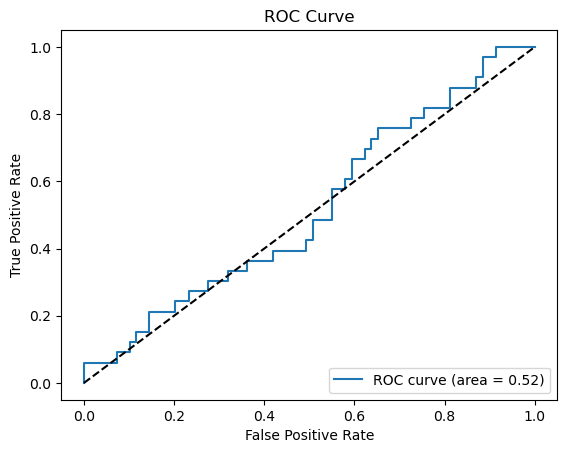

In [24]:
# Train and evaluate different models

# 1. Logistic Regression
print("Logistic Regression:")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
evaluate_model(lr_model, X_test, y_test)

Support Vector Machine:
Confusion Matrix:
 [[65  4]
 [28  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80        69
           1       0.56      0.15      0.24        33

    accuracy                           0.69       102
   macro avg       0.63      0.55      0.52       102
weighted avg       0.65      0.69      0.62       102

ROC AUC Score: 0.4848484848484848


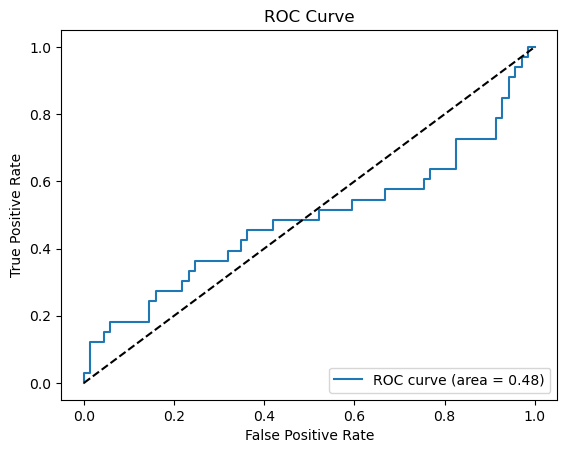

In [25]:
# 2. Support Vector Machine
print("Support Vector Machine:")
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, X_test, y_test)

Random Forest:
Confusion Matrix:
 [[59 10]
 [24  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        69
           1       0.47      0.27      0.35        33

    accuracy                           0.67       102
   macro avg       0.59      0.56      0.56       102
weighted avg       0.63      0.67      0.64       102

ROC AUC Score: 0.5384277558190601


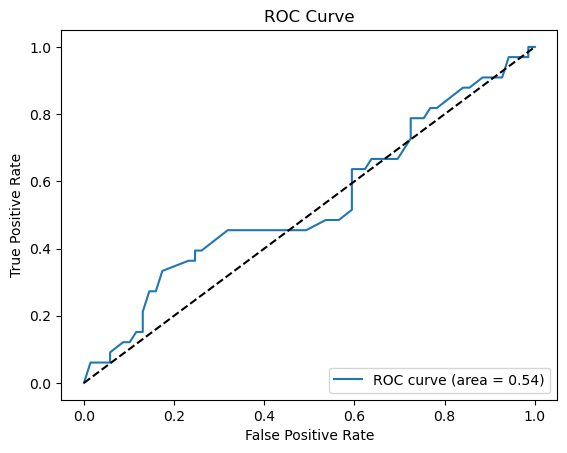

In [26]:
# 3. Random Forest
print("Random Forest:")
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

k-Nearest Neighbors:
Confusion Matrix:
 [[48 21]
 [23 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69        69
           1       0.32      0.30      0.31        33

    accuracy                           0.57       102
   macro avg       0.50      0.50      0.50       102
weighted avg       0.56      0.57      0.56       102

ROC AUC Score: 0.4732103645147124


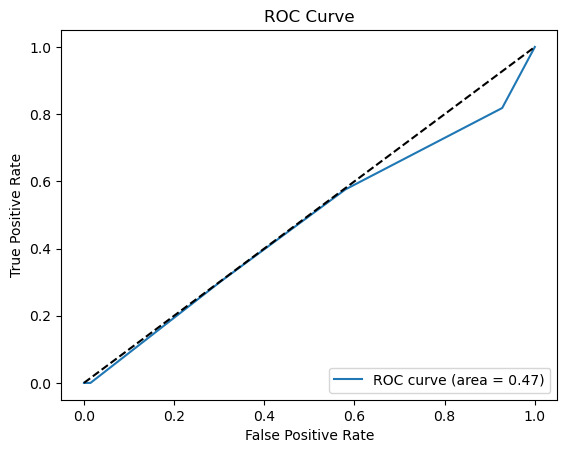

In [27]:
# 4. k-Nearest Neighbors
print("k-Nearest Neighbors:")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test)

Naive Bayes:
Confusion Matrix:
 [[42 27]
 [21 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.61      0.64        69
           1       0.31      0.36      0.33        33

    accuracy                           0.53       102
   macro avg       0.49      0.49      0.48       102
weighted avg       0.55      0.53      0.54       102

ROC AUC Score: 0.5169082125603865


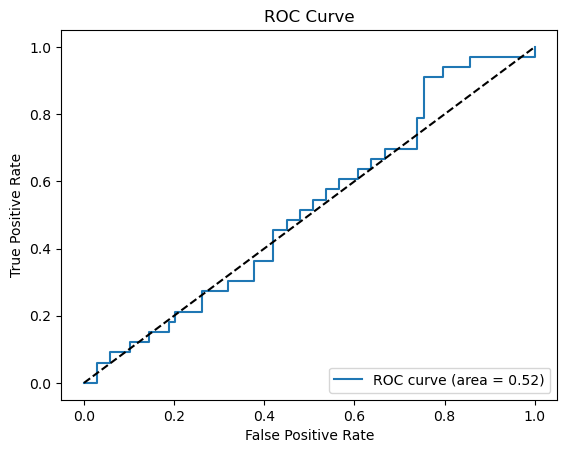

In [28]:
# 5. Naive Bayes
print("Naive Bayes:")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
evaluate_model(nb_model, X_test, y_test)

Decision Tree:
Confusion Matrix:
 [[44 25]
 [20 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.66        69
           1       0.34      0.39      0.37        33

    accuracy                           0.56       102
   macro avg       0.51      0.52      0.51       102
weighted avg       0.58      0.56      0.57       102

ROC AUC Score: 0.5158102766798419


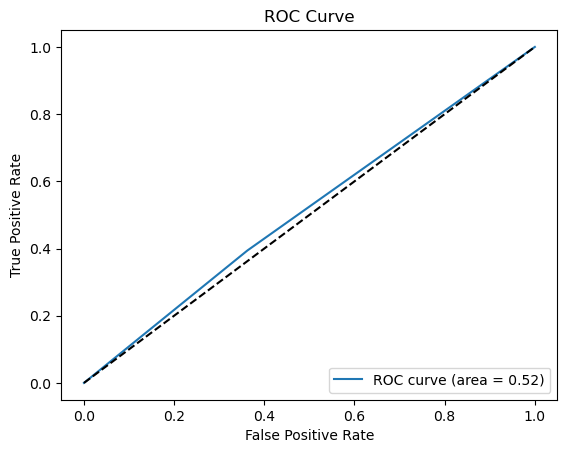

In [29]:
# 6. Decision Tree
print("Decision Tree:")
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test)

Linear Discriminant Analysis:
Confusion Matrix:
 [[55 14]
 [25  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        69
           1       0.36      0.24      0.29        33

    accuracy                           0.62       102
   macro avg       0.53      0.52      0.51       102
weighted avg       0.58      0.62      0.59       102

ROC AUC Score: 0.5142731664470794


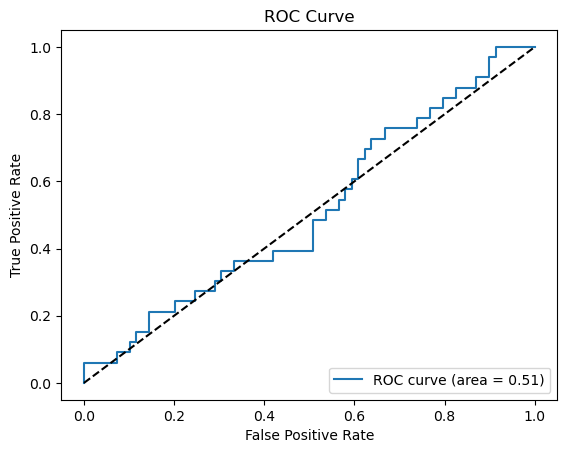

In [30]:
# 7. Linear Discriminant Analysis
print("Linear Discriminant Analysis:")
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
evaluate_model(lda_model, X_test, y_test)

Bagging:
Confusion Matrix:
 [[57 12]
 [25  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.75        69
           1       0.40      0.24      0.30        33

    accuracy                           0.64       102
   macro avg       0.55      0.53      0.53       102
weighted avg       0.60      0.64      0.61       102

ROC AUC Score: 0.5445761967501097


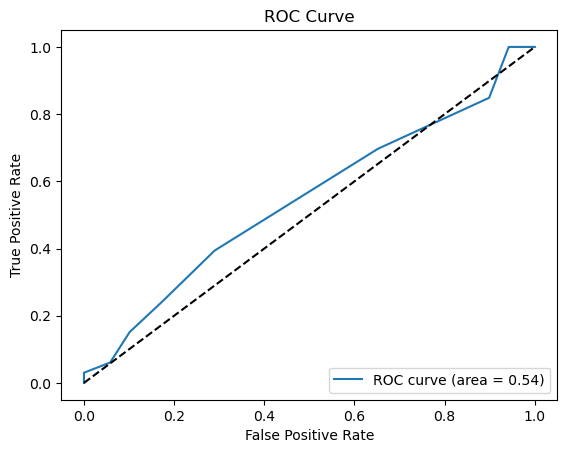

In [31]:
# 8. Bagging
print("Bagging:")
bag_model = BaggingClassifier()
bag_model.fit(X_train, y_train)
evaluate_model(bag_model, X_test, y_test)

Boosting:
Confusion Matrix:
 [[49 20]
 [21 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71        69
           1       0.38      0.36      0.37        33

    accuracy                           0.60       102
   macro avg       0.54      0.54      0.54       102
weighted avg       0.59      0.60      0.60       102

ROC AUC Score: 0.5296442687747035


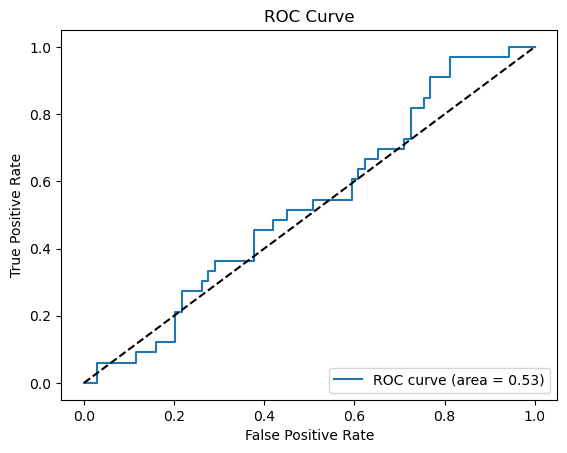

In [36]:
# 9. Boosting
print("Boosting:")
bo_model = AdaBoostClassifier()
bo_model.fit(X_train, y_train)
evaluate_model(bo_model, X_test, y_test)

In [33]:
# Hyperparameter Tuning with GridSearchCV (Example with Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


Confusion Matrix:
 [[64  5]
 [28  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.80        69
           1       0.50      0.15      0.23        33

    accuracy                           0.68       102
   macro avg       0.60      0.54      0.51       102
weighted avg       0.63      0.68      0.61       102

ROC AUC Score: 0.4861660079051383


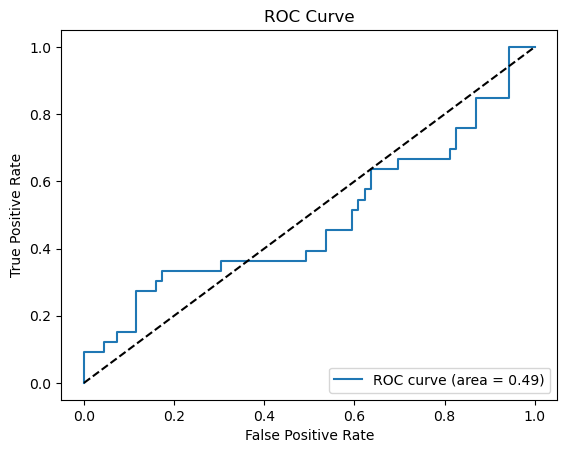

Confusion Matrix:
 [[51 18]
 [22 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        69
           1       0.38      0.33      0.35        33

    accuracy                           0.61       102
   macro avg       0.54      0.54      0.54       102
weighted avg       0.60      0.61      0.60       102

ROC AUC Score: 0.5182257356170399


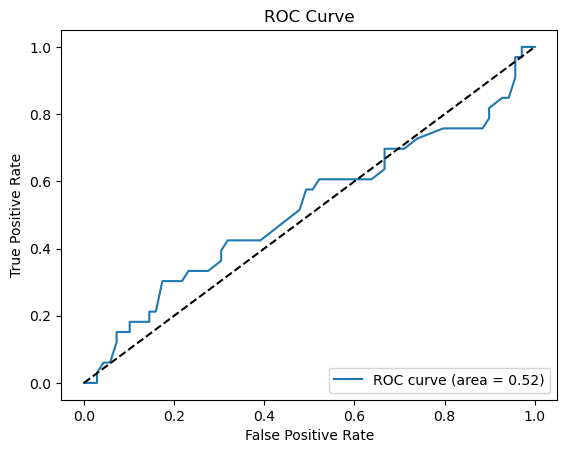

In [34]:
# Evaluate the best model from grid search
best_rf_model = grid_search.best_estimator_
evaluate_model(best_rf_model, X_test, y_test)

# Handling Imbalanced Data (Example with SMOTE)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a model on the balanced data
rf_model_smote = RandomForestClassifier()
rf_model_smote.fit(X_train_smote, y_train_smote)
evaluate_model(rf_model_smote, X_test, y_test)